In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
import calculator

In [52]:
omega_ratios = np.array([0.01*value for value in range(10, 1000)])
discrete_omega_ratios = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2, 1.5, 2.0, 4.0, 10.0])
resistance_value = 20.0
experiment_result = np.array([0.121,0.424,0.852,1.547,2.523,5.783,13.291,16.623,18.909,16.012,12.27,6.785,-1.96,-9.269,-23.531,-40.274])

# refer to http://mirrors.ibiblio.org/CTAN/fonts/stix/doc/stix.pdf
marker_set = ["o", u"$\u2299$"]

 ## マーカーの種類
 - 円プロット用

![circle_marker](pics/circle_marker.png)

- 三角形プロット用

![triangle_marker](pics/triangle_marker.png)

- 正方形プロット用

![square_marker](pics/square_marker.png)

1文字の記号であらわされる標準マーカーは[ここ](https://matplotlib.org/stable/api/markers_api.html)を参照

## データ点のプロット
まず白色で塗りつぶされたマーカーを少し小さなサイズでプロットし，そのあとに目的のマーカーを配置する

`zorder`属性の値が大きいものほど紙面の表に来るので，曲線よりもマーカーの`zorder`の値を大きくする

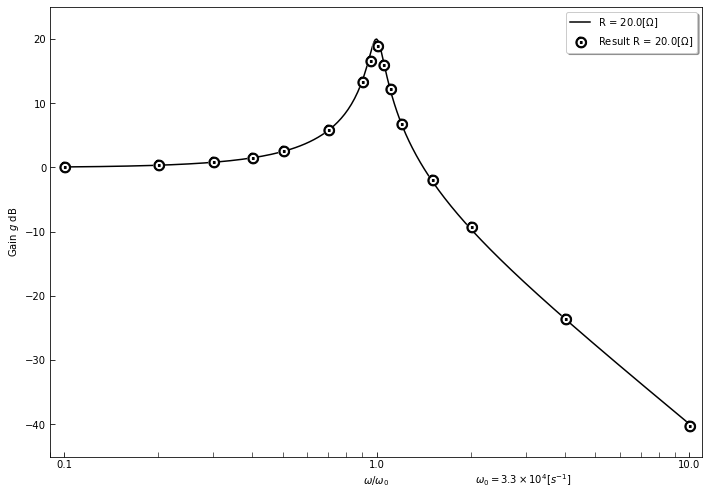

In [54]:
xmin = 0.09
xmax = 11.0
ymin = -45.0
ymax = 25.0

fig = plt.figure(figsize=(11.69, 8.27))
ax = fig.add_subplot(111)
ax.text(0.8, -0.06, "${\omega}_0 = 3.3 \\times 10^4 [s^{-1}]$", horizontalalignment='right', transform=ax.transAxes)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel("${\omega}/{{\omega}_0}$")
ax.set_ylabel("Gain $g$ dB")
ax.set_xscale('log')
ax.tick_params(direction="in", length=5, colors="black", which='both')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.plot(omega_ratios,
        calculator.calculate_gain(omega_ratios, attenuation_coefficient=calculator.calculate_attenuation_coef(resistance=resistance_value)),
        color="black",
        linestyle="solid",
        label=f"R = {resistance_value}$[\Omega]$",
        zorder=1
       )

# First, plot dummy marker
ax.scatter(discrete_omega_ratios,
           experiment_result,
           marker=marker_set[0],
           s=100,
           color="white",
           zorder=2
          )
# Then plot the desired marker
ax.scatter(discrete_omega_ratios,
           experiment_result,
           marker=marker_set[1],
           s=150,
           linewidth=1,
           color="black",
           label=f"Result R = {resistance_value}$[\Omega]$",
           zorder=3
          )

plt.legend(shadow=True)

## グラフをPDF保存

In [45]:
# fig.savefig("gain.pdf")